In [2]:
import tire.tire_solver as tire_solver
import tire.tire_utils as tire_utils

Failed to load fast pacejka, using slow pacejka, you should really compile the fast pacejka its like 3x faster


In [3]:
tire = tire_solver.Tire(tire_utils.H_LC0_18X6_7)
print(tire)

Failed to load fast pacejka, using slow pacejka, you should really compile the fast pacejka its like 3x faster


In [4]:
import pandas as pd
run_list = {}
for i in range(0,1500,100):
    df = pd.DataFrame()
    df['fx_target']=range(-5000,5000,100)
    df['fz']=i
    def apply_tirecalc(row):
        # slipr,_,fx,_,_,_ = tire.s_r_ind_locked(row['fz'],0,0,1,row['fz'],0,0,1,row['fx_target'])
        slipr,_,fx=tire.s_r(f_z=row['fz'],s_a=0,v_avg=0,fx_target=row['fx_target'],i_a=0,upper=1.1,lower=-1.1)
        print(row['fz'],row['fx_target'])
        print(slipr,_,fx)
        fx *= tire.scaling_factor
        return pd.Series([slipr,fx])
    df[['slip','fx']] = df.apply(apply_tirecalc,axis=1)
    run_list[f'{i}']=df
    print(f"{i} done...")
run_list

0 -5000
0.0 False 0.0
0 -4900
0.0 False 0.0
0 -4800
0.0 False 0.0
0 -4700
0.0 False 0.0
0 -4600
0.0 False 0.0
0 -4500
0.0 False 0.0
0 -4400
0.0 False 0.0
0 -4300
0.0 False 0.0
0 -4200
0.0 False 0.0
0 -4100
0.0 False 0.0
0 -4000
0.0 False 0.0
0 -3900
0.0 False 0.0
0 -3800
0.0 False 0.0
0 -3700
0.0 False 0.0
0 -3600
0.0 False 0.0
0 -3500
0.0 False 0.0
0 -3400
0.0 False 0.0
0 -3300
0.0 False 0.0
0 -3200
0.0 False 0.0
0 -3100
0.0 False 0.0
0 -3000
0.0 False 0.0
0 -2900
0.0 False 0.0
0 -2800
0.0 False 0.0
0 -2700
0.0 False 0.0
0 -2600
0.0 False 0.0
0 -2500
0.0 False 0.0
0 -2400
0.0 False 0.0
0 -2300
0.0 False 0.0
0 -2200
0.0 False 0.0
0 -2100
0.0 False 0.0
0 -2000
0.0 False 0.0
0 -1900
0.0 False 0.0
0 -1800
0.0 False 0.0
0 -1700
0.0 False 0.0
0 -1600
0.0 False 0.0
0 -1500
0.0 False 0.0
0 -1400
0.0 False 0.0
0 -1300
0.0 False 0.0
0 -1200
0.0 False 0.0
0 -1100
0.0 False 0.0
0 -1000
0.0 False 0.0
0 -900
0.0 False 0.0
0 -800
0.0 False 0.0
0 -700
0.0 False 0.0
0 -600
0.0 False 0.0
0 -500
0.0 Fal

{'0':     fx_target  fz  slip   fx
 0       -5000   0   0.0  0.0
 1       -4900   0   0.0  0.0
 2       -4800   0   0.0  0.0
 3       -4700   0   0.0  0.0
 4       -4600   0   0.0  0.0
 ..        ...  ..   ...  ...
 95       4500   0   0.0  0.0
 96       4600   0   0.0  0.0
 97       4700   0   0.0  0.0
 98       4800   0   0.0  0.0
 99       4900   0   0.0  0.0
 
 [100 rows x 4 columns],
 '100':     fx_target   fz      slip          fx
 0       -5000  100 -0.067611 -179.992389
 1       -4900  100 -0.067611 -179.992389
 2       -4800  100 -0.067611 -179.992389
 3       -4700  100 -0.067611 -179.992389
 4       -4600  100 -0.067611 -179.992389
 ..        ...  ...       ...         ...
 95       4500  100  0.093717  177.115955
 96       4600  100  0.093717  177.115955
 97       4700  100  0.093717  177.115955
 98       4800  100  0.093717  177.115955
 99       4900  100  0.093717  177.115955
 
 [100 rows x 4 columns],
 '200':     fx_target   fz      slip          fx
 0       -5000  200 -

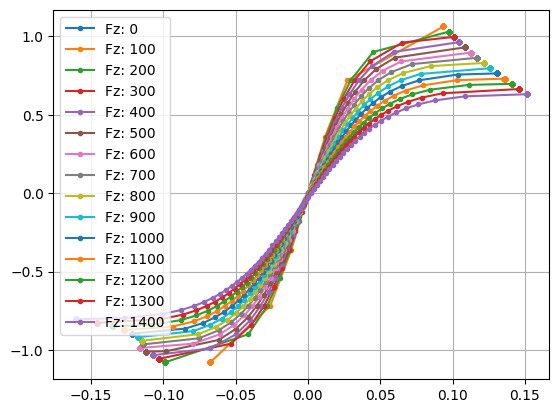

In [5]:
import matplotlib.pyplot as plt 

for key,value in run_list.items():
    # print(key)
    # print(value['fz'])
    plt.plot(value['slip'],value['fx']/value['fz']*0.6,label=f'Fz: {key}',marker='.')
plt.grid(True)
plt.legend()
# plt.xlim((-2,2))
plt.show()